In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
import cv2
import imutils 
import numpy as np
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Exctracting Questions

In [3]:
!pip install imutils

In [7]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path, detail = 0)

In [8]:
Question_file = 'resized_imaged.jpg'
Answer_file = 'resized_imaged.jpg'

In [9]:
result = recognize_text(Question_file)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['For the nert questions- plense think about',
 'highest level of education (high school diplona',
 'Hucnona',
 'certifcate degree;',
 'Ir you attended graduate or protessional school. please think about',
 'LUT',
 'macclr',
 'eercl',
 'Sruna',
 'Neulr',
 'SLULg',
 '0iR2FL',
 '4016a2',
 'Ten',
 '4mtt',
 'Please rate Your level of agreement with the following statements:',
 'My edlucation',
 'W4s',
 'worth the cost.',
 'Mv elucalion',
 'Myt',
 'allraclive canclidlale',
 'polenlial',
 'emplayers_',
 'My education helped me achieve my goals_',
 'learned important skills while obtaining my education that',
 'use in my',
 'day-lo-day',
 'Lile.',
 'The courses',
 'took while obtaining my education are directly relevant to',
 'auka',
 'work',
 'My school',
 'program',
 'provided me with suppot to help me',
 'learn ad be',
 'successtul in my',
 'casees',
 'My school or program provicled mne with resources and support',
 'job_',
 'felt like part ot',
 'community at my school where',
 'obtained 

In [10]:
Final_question =[]
i =0
j =0
while (i<len(result)-2):
    st = ''
    if result[i].split('.')[0].isnumeric():
        Final_question.append(result[i])
        j=j+1
    else:
#         print(j)
        Final_question[j-1] =Final_question[j-1]+' '+result[i]
    i=i+1

IndexError: list index out of range

In [11]:
Final_question

[]

# Extracting Answers

In [8]:
img1 = cv2.imread(Question_file)
img2 = cv2.imread(Answer_file)

In [9]:
img1.shape

(919, 937, 3)

In [10]:
img2.shape

(919, 937, 3)

In [11]:
# img1 = cv2.imread("checked.png")
# img2 = cv2.imread("without select.png")
diff = cv2.absdiff(img1, img2)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
th = 1
imask =  mask>th

result = np.zeros_like(img2, np.uint8)
result[imask] = img2[imask]

cv2.imwrite("result final.png", diff)


True

In [12]:
diff.shape

(919, 937, 3)

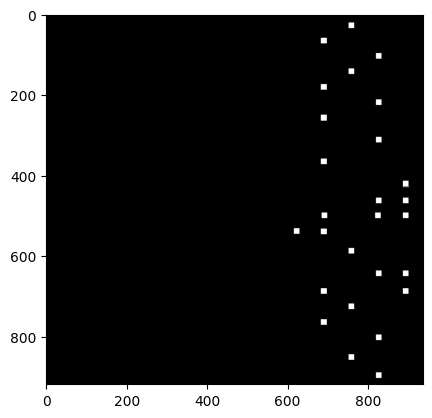

In [13]:
img_1 = cv2.cvtColor(diff, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [14]:
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)[1]

In [15]:
# find contours and get one with area about 180*35
# draw all contours in green and accepted ones in red
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
#area_thresh = 0

In [16]:
# contours

In [17]:
min_area = 0.5*17*17
max_area = 2.5*17*17
result = gray.copy()

In [18]:
count =1 
image_number = 0
ck_box = []
answer =[]
for c in contours:
#     print(c)
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        option = ''

        count+=1
        
        cv2.drawContours(result, [c], -1, (0, 0, 255), 1)
        x,y,w,h = cv2.boundingRect(c)
        ROI = thresh[y:y+h, x:x+w]
        if x>=600 and x<=650:
            option ='a'
        elif x>=670 and x<=700:
            option ='b'
        elif x>=750 and x<=770:
            option ='c'
        elif x>=800 and x<=850:
            option ='d'
        elif x>=870 and x<=890:
            option ='e'
#         print([x,x+w] , option)
        
        
        ck_box.append([[x,x+w]  ,[ y,y+h] ,option])
        t = ( y,y+h)
        if y==532:
            answer.append({(y+1,y+h+1) : option })
        else:
            answer.append({(y,y+h) : option })
            


    
        cv2.rectangle(thresh, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1
        

In [19]:
answer.reverse()

In [20]:
answer

[{(21, 35): 'c'},
 {(59, 73): 'b'},
 {(97, 111): 'd'},
 {(135, 149): 'c'},
 {(174, 188): 'b'},
 {(212, 226): 'd'},
 {(250, 265): 'b'},
 {(305, 319): 'd'},
 {(359, 373): 'b'},
 {(414, 428): 'e'},
 {(456, 470): 'd'},
 {(456, 470): 'e'},
 {(493, 507): 'b'},
 {(493, 507): 'd'},
 {(493, 507): 'e'},
 {(533, 547): 'a'},
 {(533, 547): 'b'},
 {(581, 595): 'c'},
 {(637, 651): 'd'},
 {(637, 651): 'e'},
 {(681, 695): 'b'},
 {(681, 695): 'e'},
 {(719, 733): 'c'},
 {(758, 772): 'b'},
 {(796, 810): 'd'},
 {(845, 859): 'c'},
 {(890, 904): 'd'}]

In [21]:
def merge_list_of_dictionaries(dict_list):
  new_dict = {}
  for d in answer:
    for d_key in d:
      if d_key not in new_dict:
        new_dict[d_key] = []
      new_dict[d_key].append(d[d_key])
  return new_dict

In [22]:
final_answer = merge_list_of_dictionaries(answer)

In [23]:
list(final_answer.values())

[['c'],
 ['b'],
 ['d'],
 ['c'],
 ['b'],
 ['d'],
 ['b'],
 ['d'],
 ['b'],
 ['e'],
 ['d', 'e'],
 ['b', 'd', 'e'],
 ['a', 'b'],
 ['c'],
 ['d', 'e'],
 ['b', 'e'],
 ['c'],
 ['b'],
 ['d'],
 ['c'],
 ['d']]

In [24]:
Final_question

['1.Ican think of several different ways to deal with a disagreement',
 '2. Ihave thought about how [ normally respond to conflicts.',
 '3. [ feel about how I handle most conflicts or disagreements_',
 '4. The ways to resolve conflicts usually Work for me',
 '5.Irespond to different disagreements differently',
 "6. In an argument; I try to understand the other person' of view:",
 '7. When someone is upset with me; Itry to find out why.',
 '8. If two friends are arguing; I ty to understand both sides of the argument to figure out if someone is arguing just because they re in a bad mood_',
 '10. Instead of jumping to conclusions to figure out why there $ a disagreement',
 '11. to understand if a disagreement is caused by & misunderstanding',
 '12. When I m mad at a friend; [ avoid to him or her.',
 '13.Itry to find win-win solutions to disagreements_',
 '14. When I disagree with someone; I talk about how I feel and listen to tem talk about hOW they',
 '15. When I m involved in a disagree

In [25]:
Ans = []
for qus in Final_question:
    row = {}
    
    row[qus.split('.')[0]] = qus.split('.')[1]
    row ['Answers']  =  list(final_answer.values())[int(qus.split('.')[0])-1]
    Ans.append(row)

In [26]:
Ans

[{'1': 'Ican think of several different ways to deal with a disagreement',
  'Answers': ['c']},
 {'2': ' Ihave thought about how [ normally respond to conflicts',
  'Answers': ['b']},
 {'3': ' [ feel about how I handle most conflicts or disagreements_',
  'Answers': ['d']},
 {'4': ' The ways to resolve conflicts usually Work for me', 'Answers': ['c']},
 {'5': 'Irespond to different disagreements differently', 'Answers': ['b']},
 {'6': " In an argument; I try to understand the other person' of view:",
  'Answers': ['d']},
 {'7': ' When someone is upset with me; Itry to find out why',
  'Answers': ['b']},
 {'8': ' If two friends are arguing; I ty to understand both sides of the argument to figure out if someone is arguing just because they re in a bad mood_',
  'Answers': ['d']},
 {'10': ' Instead of jumping to conclusions to figure out why there $ a disagreement',
  'Answers': ['e']},
 {'11': ' to understand if a disagreement is caused by & misunderstanding',
  'Answers': ['d', 'e']},
 

In [6]:
import cv2

img = cv2.imread('page1.png')

# Get original height and width
print(f"Original Dimensions : {img.shape}")

# resize image by specifying custom width and height
resized = cv2.resize(img, (919, 937))

print(f"Resized Dimensions : {resized.shape}")
cv2.imwrite('resized_imaged.jpg', resized)

Original Dimensions : (2196, 1700, 3)
Resized Dimensions : (937, 919, 3)


True